SRN 230713176 <br>
ST2195 Coursework <br>
Part 1 (a) & (b)

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Part 1 (a)

In [33]:
# set random seed for reproducibility
np.random.seed(42)

In [34]:
# define the probability density function f(x)
def f(x):
    """
    Laplace distribution (the target distribution)
    f(x) = (1/2) * exp(-|x|)
    """
    return 0.5 * np.exp(-np.abs(x))

In [35]:
# create a MCMC Metropolis-Hastings Random Walk Algorithm
def metropolis(N, x0, s):
    """
    MCMC Metropolis-Hastings Random Walk Algorithm

    Parameters:
    N: Numbers of samples
    s: Standard deviation for proposal distribution
    x0: initial value

    Returns:
    values: Array of generated samples
    """
    
    # Step 1
    values = np.zeros(N + 1) # array to store samples
    values[0] = x0  # set initial value x0

    # Step 2: main algorithm loop
    for i in range(1, N + 1):
        x_star = np.random.normal(loc=values[i-1], scale=s) # new value x*
        ratio = f(x_star) / f(values[i-1]) # acceptance ratio
        u = np.random.uniform(0, 1)

        # accept or reject
        if np.log(u) < np.log(ratio):
            values[i] = x_star
        else:
            values[i] = values[i-1]
    return values

In [36]:
# calculate acceptance ratio
def acceptance_ratio(values):
    accepted = np.sum(values[1:] != values[:-1])

    return accepted / (len(values) - 1)

In [37]:
# parameters given in the question
x0 = 0
N = 10000
s = 1

In [38]:
# run the algorithm
samples = metropolis(N, x0, s)

In [39]:
# calculate sample statistics
sample_mean = np.mean(samples)
sample_sd = np.std(samples, ddof=1)
acc_ratio = acceptance_ratio(samples)

In [40]:
# show results
print(f"Sample Mean: {sample_mean:.6f}")
print(f"Sample Standard Deviation: {sample_sd:.6f}")
print(f"Acceptance ratio: {acc_ratio:.3f}")
print(f"Target Mean: 0") # to compare with Laplace distribution mean
print(f"Target Standard Deviation: {np.sqrt(2):.6f}")

Sample Mean: 0.079106
Sample Standard Deviation: 1.315996
Acceptance ratio: 0.708
Target Mean: 0
Target Standard Deviation: 1.414214


### Visualization of results

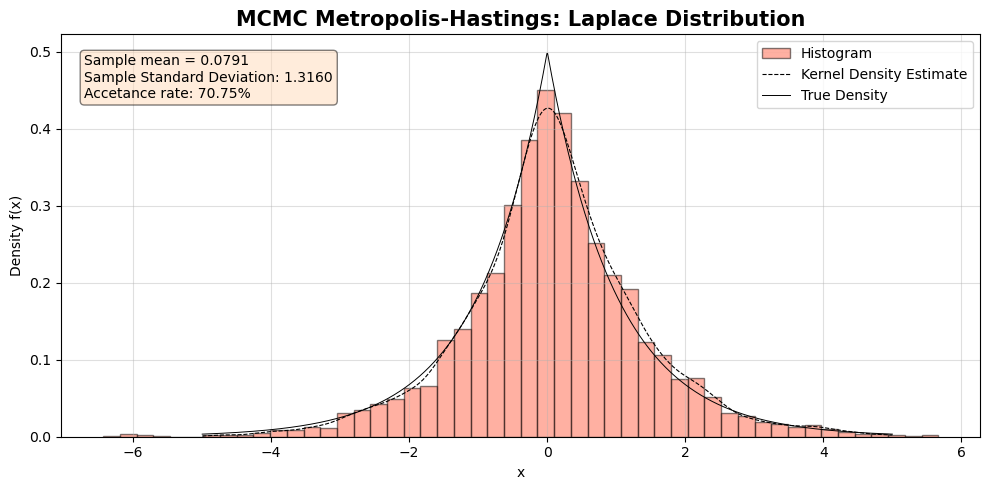

In [41]:
# creating a histogram
fig, ax = plt.subplots(figsize=(10, 5))
counts, bins, patches = ax.hist(samples, bins=50, density=True, alpha=0.5, color='tomato', edgecolor='black', label='Histogram')

# Kernel Density Plot
# Kernel Density Estimate (KDE)
kd = stats.gaussian_kde(samples)
x_kd = np.linspace(-5, 5, 1000)
y_kd = kd(x_kd)
ax.plot(x_kd, y_kd, 'k--', linewidth=0.8, label='Kernel Density Estimate') 

# True Density Curve (for comparison)
x_true = np.linspace(-5, 5, 1000)
y_true = 0.5 * np.exp(-np.abs(x_true))
ax.plot(x_true, y_true, 'k', linewidth=0.7, label='True Density' )

# Labels and other style formatting
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('Density f(x)', fontsize=10)

ax.set_title('MCMC Metropolis-Hastings: Laplace Distribution', fontsize=15, fontweight='bold')
ax.set_subtitle = f'N= 10000, s= 1'
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.4)

textstr = f'Sample mean = {sample_mean:.4f}\nSample Standard Deviation: {sample_sd:.4f}\nAccetance rate: {(acc_ratio)*100:.2f}%'
props = dict(boxstyle='round', facecolor='peachpuff', alpha=0.5)
ax.text(0.025, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.tight_layout()
plt.savefig('1a_plot.png', dpi=300, bbox_inches='tight')


## Part 1 (b): Convergence Diagnosis

In [24]:
# define a function to calculate R-hat
def calculate_r_hat(N, x0_vals, s):

    J = len(x0_vals)
    Mj = np.zeros(J)
    Vj = np.zeros(J)

    for j, x0 in enumerate(x0_vals):
        samples = metropolis(N, x0, s)
        Mj[j] = np.mean(samples)
        Vj[j] = np.var(samples)

    M = np.mean(Mj)
    W = np.mean(Vj)
    B = 1 / J * np.sum((Mj - M)**2)
    
    R = np.sqrt((W + B) / W)
    
    return R

In [28]:
# a) calculating r-hat for parameters given in the question
N = 2000
s_vals = np.linspace(0.001, 1, 1000)
J = 4
x0_vals = [0.1, 0.5, 1.0, 2.0]

In [29]:
# compute R hat values for a grid of s values
R_hat_values = []
for s in s_vals:
    Rhat = calculate_r_hat(N, x0_vals, s)
    if Rhat < 2.5:  # Only consider R hat values less than 2.5
        R_hat_values.append(Rhat)
    else:
        R_hat_values.append(np.nan)  # Replace R hat >= 2.5 with NaN for plotting

### Visualization of results

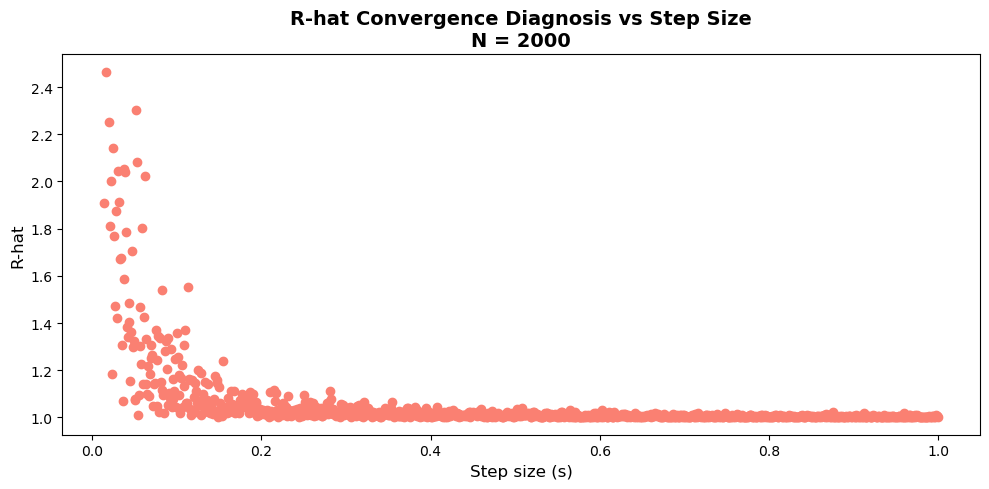

In [31]:
# create a scatter plot
plt.figure(figsize=(10, 5))
plt.title(f'R-hat Convergence Diagnosis vs Step Size\nN = {N}', fontsize=14, fontweight='bold')
plt.scatter(s_vals, R_hat_values, color = 'salmon')
plt.xlabel('Step size (s)', fontsize=12)
plt.ylabel('R-hat', fontsize=12)
plt.tight_layout()
plt.savefig('1b_plot.png', dpi=300, bbox_inches='tight')
plt.show()